## Библиотеки: matplotlib, seaborn, funnel

Displot - distribution plot. (Показывает сколько значений имеется в ваших данных)

Box plot - помагает найти аномалии (найти выбросы). Делит на квартилии. Усы (по краям) - макс и мин значение данных

Pie Chart - процентное соотношение (деление на доли)

Heatmap - карта корреляций. связь между скалярными значениями. взаимосвязь. бывает позитивная и негативная


In [1]:
import pandas as pd

In [2]:
df = pd.read_csv('../datasets/real_estate_data.csv', sep='\t')

In [3]:
# preparing the data first
cities = df.groupby('locality_name').agg({'total_images': 'count'}).reset_index().sort_values(by='total_images', ascending=False)
cities = cities[cities['total_images'] > 50]
cities = cities.drop('total_images', axis=1)
data = cities.merge(df, on='locality_name', how='left')

In [4]:
data = data.drop_duplicates()

In [5]:
data['price_mln'] = data['last_price'] / 1000000

In [6]:
data['price_mln']

0        13.000
1         5.196
2        64.900
3        10.000
4         7.915
          ...  
21631     1.930
21632     1.800
21633     2.900
21634     1.950
21635     1.100
Name: price_mln, Length: 21636, dtype: float64

In [7]:
import matplotlib.pyplot as plt

In [8]:
pie = data.query('locality_name != "Санкт-Петербург"') # getting rid of the "Санкт-Петербург"

In [9]:
pie = pie.groupby('locality_name').agg({'total_images': 'sum'}).sort_values(by='total_images', ascending=False).reset_index()

In [10]:
pie = pie.rename({'total_images': 'amount_of_posts'}, axis=1)
pie

,locality_name,amount_of_posts
0,посёлок Мурино,4524
1,Всеволожск,4081
2,посёлок Шушары,3872
3,Пушкин,3443
4,Колпино,2993
5,посёлок Парголово,2843
6,Гатчина,2766
7,деревня Кудрово,2597
8,Выборг,2294
9,Петергоф,2088


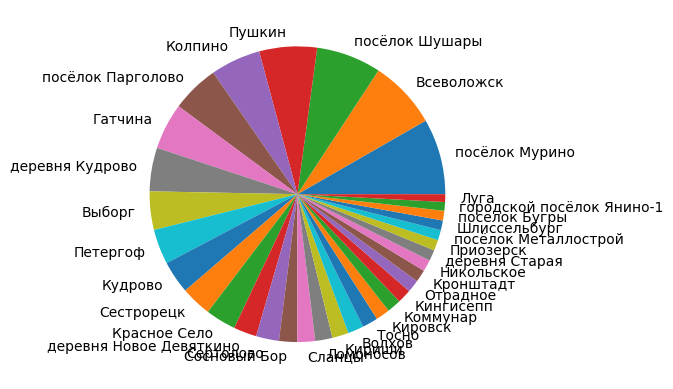

In [11]:
plt.pie(pie['amount_of_posts'], labels = pie['locality_name'])
plt.show()

In [12]:
import seaborn as sns

In [13]:
data.columns

Index(['locality_name', 'total_images', 'last_price', 'total_area',
       'first_day_exposition', 'rooms', 'ceiling_height', 'floors_total',
       'living_area', 'floor', 'is_apartment', 'studio', 'open_plan',
       'kitchen_area', 'balcony', 'airports_nearest', 'cityCenters_nearest',
       'parks_around3000', 'parks_nearest', 'ponds_around3000',
       'ponds_nearest', 'days_exposition', 'price_mln'],
      dtype='object')

<Axes: xlabel='ceiling_height'>

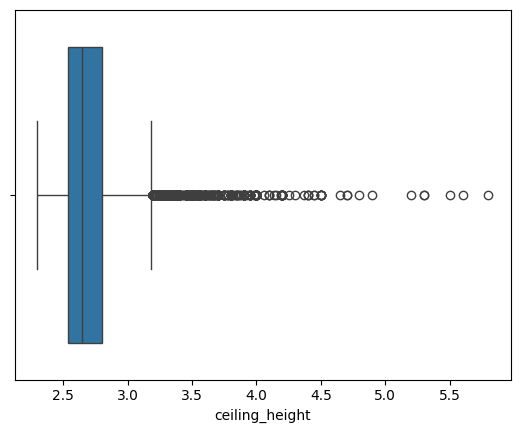

In [14]:
sns.boxplot(x = data.query('ceiling_height < 6 and ceiling_height > 2')['ceiling_height'])

<Axes: xlabel='ceiling_height'>

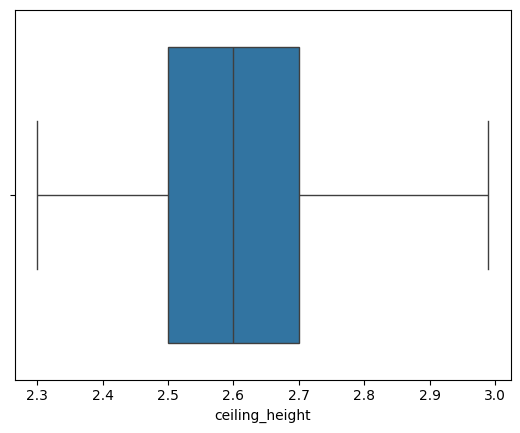

In [15]:
sns.boxplot(x = data.query('ceiling_height < 3 and ceiling_height > 2')['ceiling_height'])

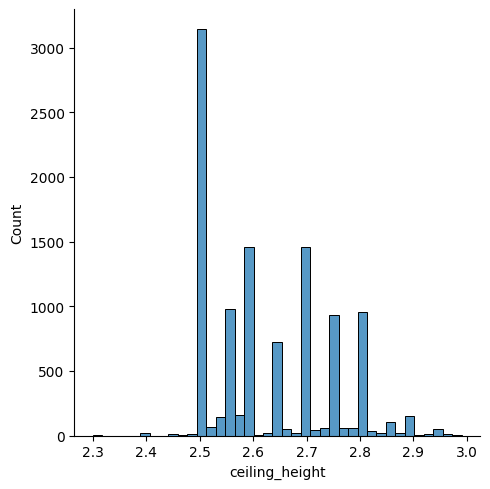

In [16]:
sns.displot(data.query('ceiling_height < 3 and ceiling_height > 2')['ceiling_height'])

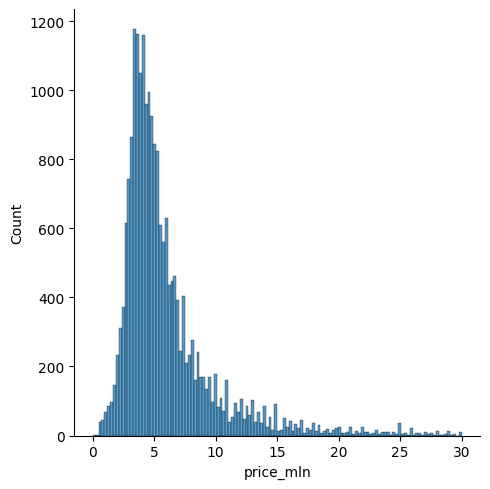

In [17]:
sns.displot(data.query('price_mln < 30')['price_mln'])

In [24]:
test = data['last_price']/1_000_000
test

0        13.000
1         5.196
2        64.900
3        10.000
4         7.915
          ...  
21631     1.930
21632     1.800
21633     2.900
21634     1.950
21635     1.100
Name: last_price, Length: 21636, dtype: float64

In [18]:
# Корреляция - это показатель отражающий взаимосвязь между объектами или событиями
data.corr(numeric_only=True)

,total_images,last_price,total_area,rooms,ceiling_height,floors_total,living_area,floor,studio,open_plan,kitchen_area,balcony,airports_nearest,cityCenters_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition,price_mln
total_images,1.000000,0.104412,0.115073,0.098476,-0.003087,0.004964,0.103885,0.026030,-0.030231,-0.026585,0.107174,0.121006,-0.001128,-0.048710,0.021799,-0.008841,-0.011661,-0.004753,-0.027864,0.104412
last_price,0.104412,1.000000,0.654219,0.368709,0.088269,-0.035408,0.568706,0.008756,-0.027040,-0.009827,0.516050,0.027246,-0.025723,-0.209680,0.153089,-0.016909,0.161811,-0.086121,0.085198,1.000000
total_area,0.115073,0.654219,1.000000,0.761126,0.098710,-0.099529,0.940239,-0.037996,-0.073663,-0.035334,0.608467,0.043251,-0.029723,-0.236184,0.168483,-0.022757,0.164652,-0.101984,0.155102,0.654219
rooms,0.098476,0.368709,0.761126,1.000000,0.056999,-0.247020,0.846594,-0.159684,-0.148458,-0.087848,0.276540,0.015783,-0.060295,-0.187599,0.139979,-0.055520,0.093513,-0.059404,0.129007,0.368709
ceiling_height,-0.003087,0.088269,0.098710,0.056999,1.000000,-0.033433,0.092705,-0.013716,0.001738,0.046708,0.090889,0.042698,-0.023121,-0.092553,0.066700,-0.019369,0.078445,-0.059557,0.020257,0.088269
floors_total,0.004964,-0.035408,-0.099529,-0.247020,-0.033433,1.000000,-0.191526,0.667394,0.067081,0.052100,0.140178,0.200580,0.117491,0.040409,-0.252621,0.095210,-0.121062,0.040282,-0.049733,-0.035408
living_area,0.103885,0.568706,0.940239,0.846594,0.092705,-0.191526,1.000000,-0.107902,-0.056999,-0.033585,0.430843,0.014776,-0.057046,-0.236489,0.188412,-0.051152,0.150429,-0.085233,0.147884,0.568706
floor,0.026030,0.008756,-0.037996,-0.159684,-0.013716,0.667394,-0.107902,1.000000,0.034881,0.036689,0.119040,0.170622,0.077916,0.023274,-0.162924,0.071756,-0.074922,0.026104,-0.037116,0.008756
studio,-0.030231,-0.027040,-0.073663,-0.148458,0.001738,0.067081,-0.056999,0.034881,1.000000,-0.004411,NaN,0.031883,-0.021385,-0.007076,-0.029931,0.009055,0.000124,0.001955,-0.022756,-0.027040
open_plan,-0.026585,-0.009827,-0.035334,-0.087848,0.046708,0.052100,-0.033585,0.036689,-0.004411,1.000000,NaN,0.019504,-0.013515,-0.003425,-0.010076,0.010569,0.008645,-0.003299,-0.023876,-0.009827


<Axes: >

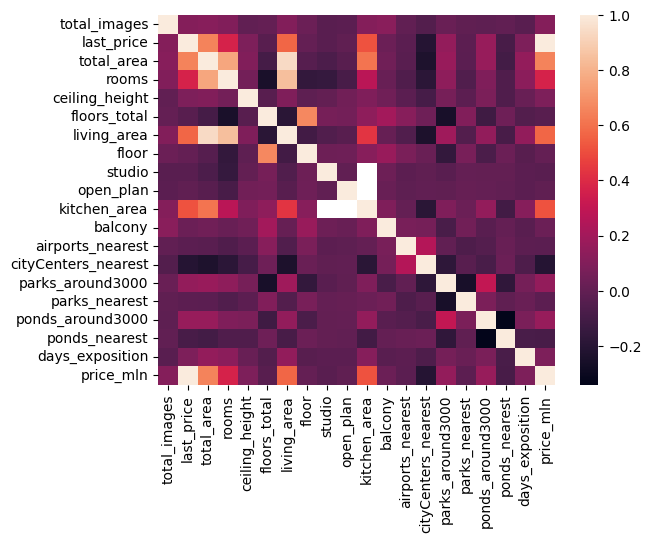

In [19]:
sns.heatmap(data.corr(numeric_only=True))

In [20]:
import plotly.express as px